In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

# Ramsey (Motional version)
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
$$
Steps:
1. Apply $\pi/2$ of BSB.
2. Wait a period of time $\tau$.
3. Apply $\pi/2$ of BSB with a phase $\phi_s$
4. Scan the phase to get a Prob($\ket{1}$) vs. phase figure.
5. Scan the wait time to get more figures in step 4.

States:
$$
\ket{\psi}_0 = \ket{0,0}\\
Step 1. \rightarrow \ket{\psi}_1 = \frac{1}{\sqrt{2}}(\ket{0,0}+\ket{1,1})\\
Step 2. \rightarrow \ket{\psi}_2 = \frac{1}{\sqrt{2}}(\ket{0,0}+e^{i\phi_N}\ket{1,1})\\
Step 3. \rightarrow \ket{\psi}_3 = \frac{1}{2}[(\ket{0,0}+e^{i\phi_S}\ket{1,1})+e^{i\phi_N}(-e^{i\phi_S}\ket{0,0}+\ket{1,1})]\\
= \frac{1}{2}[(1-e^{i(\phi_N+\phi_S)})\ket{0,0}+(e^{i\phi_S}+e^{i\phi_N})\ket{1,1}]
$$
where $\phi_N$ is the noise geenrated during the waiting time, which includes the moitonal noise (when $\ket{n=1}$) and spin noise (when $\ket{spin=1}$). $\phi_S$ is the phase we scan.

The probability of measuring state $\ket{1}$ is 
$$
Prob = \frac{1}{2}[1+cos(\phi_{S}-\phi_{N})]
$$

In [10]:
def Prob_Ramsey(phi_s, phi_n):
    return 1/2*(1+np.cos(phi_s-phi_n))

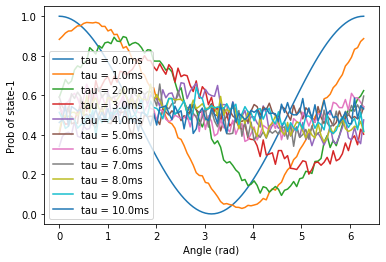

Text(0, 0.5, 'Contrast')

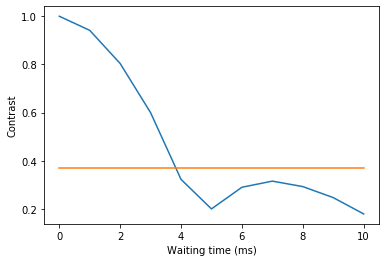

In [35]:
phi_s_list = np.linspace(0,2*np.pi, 101)
trails = 100
waiting_times = np.linspace(0,10,11)
coherence_time = 5
contrast = []
for tau in waiting_times:
    Probs = []
    for phi_s in phi_s_list:
        temp = 0
        for i in range(trails):
            phi_n = random.uniform(0, 2*np.pi)*tau/coherence_time
            temp += Prob_Ramsey(phi_s, phi_n)
        Probs.append(temp/trails)
    label = 'tau = '+str(tau)+'ms'
    plt.plot(phi_s_list, Probs, label=label)
    contrast.append(max(Probs)-min(Probs))
plt.legend()
plt.xlabel('Angle (rad)')
plt.ylabel('Prob of state-1')
plt.show()
plt.plot(waiting_times, contrast)
plt.plot(waiting_times, [0.36787944117144233 for i in range(len(waiting_times))], label = '1/e')
plt.xlabel('Waiting time (ms)')
plt.ylabel('Contrast')

## Fix the scanning phase

Text(0, 0.5, 'Prob of state-1')

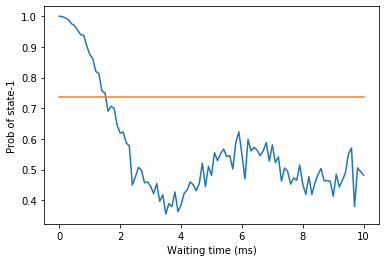

In [49]:
trails = 100
waiting_times = np.linspace(0,10,101)
coherence_time = 5
contrast = []
Probs = []

phi_s = 0
for tau in waiting_times:
    temp = 0
    for i in range(trails):
        phi_n = random.uniform(0, 2*np.pi)*tau/coherence_time
        temp += Prob_Ramsey(phi_s, phi_n)
    Probs.append(temp/trails)

plt.plot(waiting_times, Probs)
plt.plot(waiting_times, [0.36787944117144233*2 for i in range(len(waiting_times))], label = '1/e')
plt.xlabel('Waiting time (ms)')
plt.ylabel('Prob of state-1')

# Spin Echo
Steps:
1. Carrier: $\pi/2$
2. Blue sideband: $\pi$
3. Wait $\tau$
4. Blue sideband: $\pi$
5. Carrier: $\pi$
6. Blue sideband: $\pi$
7. Wait $\tau$
8. Blue sideband: $\pi$
9. Carrier: $\pi/2$
States:
$$
\ket{\psi}_0 = \ket{0,0}\\
Step 1. \rightarrow \ket{\psi}_1 = \frac{1}{\sqrt{2}}(\ket{0,0}+\ket{1,0})\\
Step 2. \rightarrow \ket{\psi}_2 = \frac{1}{\sqrt{2}}(\ket{1,1}+\ket{1,0})\\
Step 3. \rightarrow \ket{\psi}_3 = \frac{1}{\sqrt{2}}(e^{i\phi_{N1}}\ket{1,1}+\ket{1,0})e^{i\phi_{s1}}\\
Step 4. \rightarrow \ket{\psi}_4 = \frac{1}{\sqrt{2}}(e^{i\phi_{N1}}\ket{0,0}+\ket{1,0})e^{i\phi_{s1}}\\
Step 5. \rightarrow \ket{\psi}_5 = \frac{1}{\sqrt{2}}(e^{i\phi_{N1}}\ket{1,0}+\ket{0,0})e^{i\phi_{s1}}\\
Step 6. \rightarrow \ket{\psi}_6 = \frac{1}{\sqrt{2}}(e^{i\phi_{N1}}\ket{1,0}+\ket{1,1})e^{i\phi_{s1}}\\
Step 7. \rightarrow \ket{\psi}_7 = \frac{1}{\sqrt{2}} (e^{i\phi_{N1}}\ket{1,0}+e^{i\phi_{N2}}\ket{1,1})e^{i\phi_{s1+s2}}\\
Step 8. \rightarrow \ket{\psi}_8 = \frac{1}{\sqrt{2}}(e^{i\phi_{N1}}\ket{1,0}+e^{i\phi_{N2}}\ket{0,0})e^{i\phi_{s1+s2}}\\
Step 9. \rightarrow \ket{\psi}_9 = \frac{1}{2}(e^{i\phi_{N1}}(\ket{1,0}-\ket{0,0})+e^{i\phi_{N2}}(\ket{0,0}+\ket(1,0)))e^{i\phi_{s1+s2}}\\
=\frac{1}{2}[(e^{i\phi_{N1}}+e^{i\phi_{N2}})\ket{1,0}+(e^{i\phi_{N2}}-e^{i\phi_{N1}})\ket{0,0}]e^{i\phi_{s1+s2}}
$$
where $\phi_{N1}$ and $\phi_{N2}$ are the motional noise generated during the first and second waiting time. $\phi_{s1}$ and $\phi_{s2}$ are the spin noise generated during the first and second waiting time. It's clear that the spin noise is a global phase so that we can get rid of it when measuring the final states. Therefore the spin echo method is great to measure only the motional decoherence.

The probability of measuring state $\ket{1}$ is 
$$
Prob = \frac{1}{2}[1+cos(\phi_{N1}-\phi_{N2})]
$$

In [37]:
def Prob_SpinEcho(phi_n1, phi_n2):
    return 1/2*(1+np.cos(phi_n1-phi_n2))

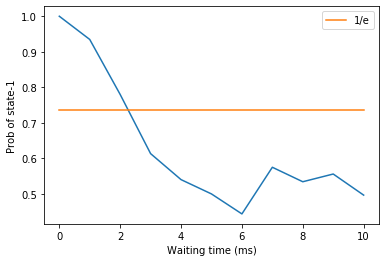

In [43]:
trails = 100
waiting_times = np.linspace(0,10,11)
coherence_time = 5
Probs = [] 

for tau in waiting_times:
    temp = 0
    for i in range(trails):
        phi_n1 = random.uniform(0, 2*np.pi)*tau/coherence_time
        phi_n2 = random.uniform(0, 2*np.pi)*tau/coherence_time
        temp += Prob_SpinEcho(phi_n1, phi_n2)
    Probs.append(temp/trails)
plt.plot(waiting_times, Probs)
plt.plot(waiting_times, [0.36787944117144233*2 for i in range(len(waiting_times))], label = '1/e')
plt.legend()
plt.xlabel('Waiting time (ms)')
plt.ylabel('Prob of state-1')
plt.show()